In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file = '.\concrete_mix_design_simplified.csv'
df = pd.read_csv(file)
df = df[df['age'] >= 28]
columns_to_drop = ['probe_index', 'name', 'weight_fresh', 'weight_at_test', 'size_x', 'size_y', 'size_z', 'age','slump.1']
df = df.drop(columns=columns_to_drop)
###############################################################################################    
target_column= 'compressive_strength'
target_column1 = 'slump'

The following code reads the data and performs preprocessing using our 'data_processing' file. 
When the 'Variance' in the bottom image is greater than 20, 
it's often advisable to rerun the 'data_processing' function. 
This is because the columns with somehow important regression relationships might have been removed.

best_params are: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
useless_feature: ['q_non_crushed_sand', 'CEM_id_CEM_III', 'CEM_id_CEM_IV', 'q_waterproofing', 'q_retardant']


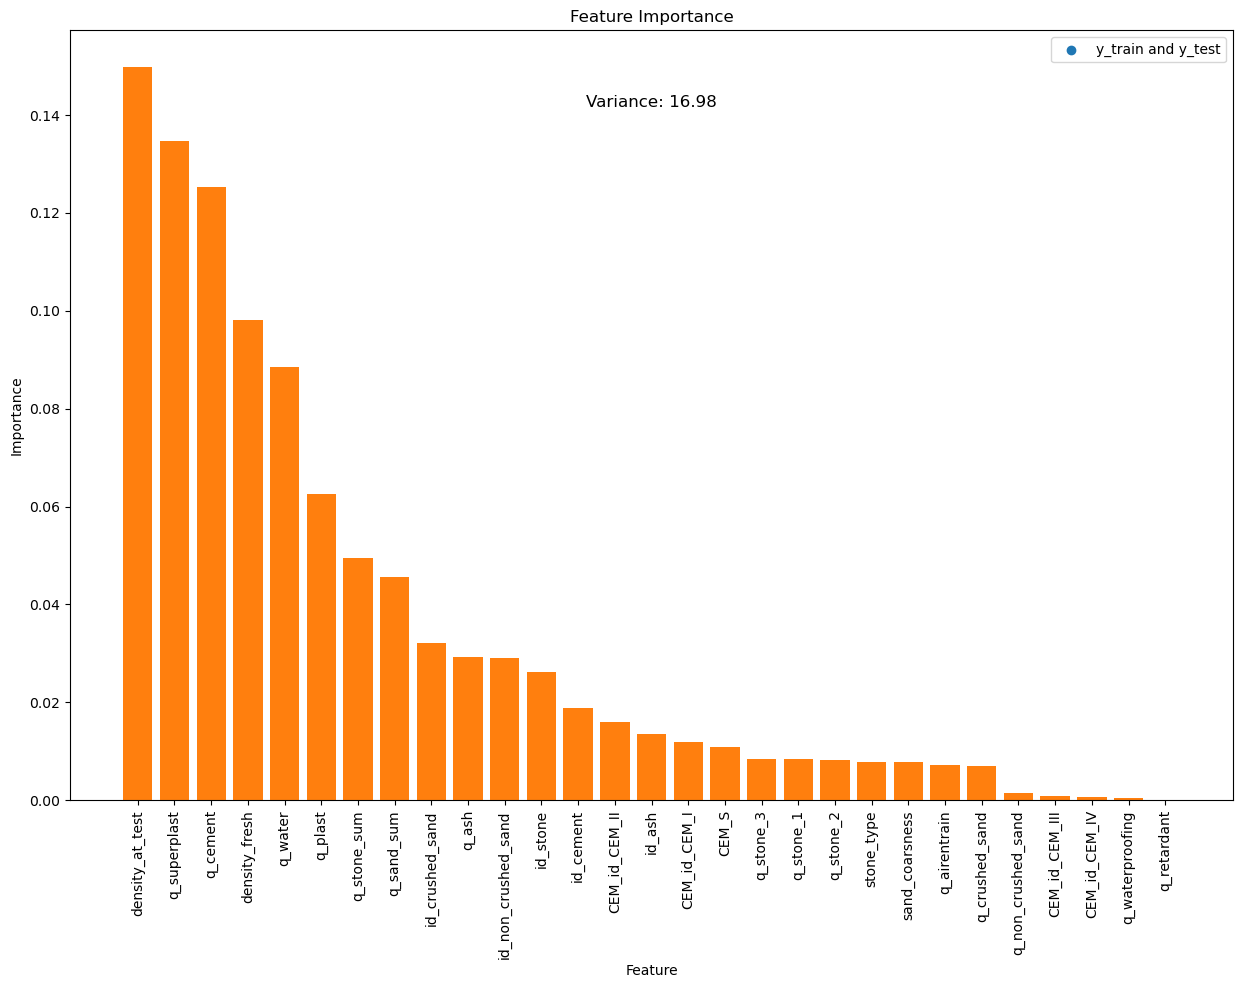

best_params are: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
useless_feature: ['q_airentrain', 'q_non_crushed_sand', 'CEM_id_CEM_III', 'q_waterproofing', 'CEM_id_CEM_IV', 'q_retardant']


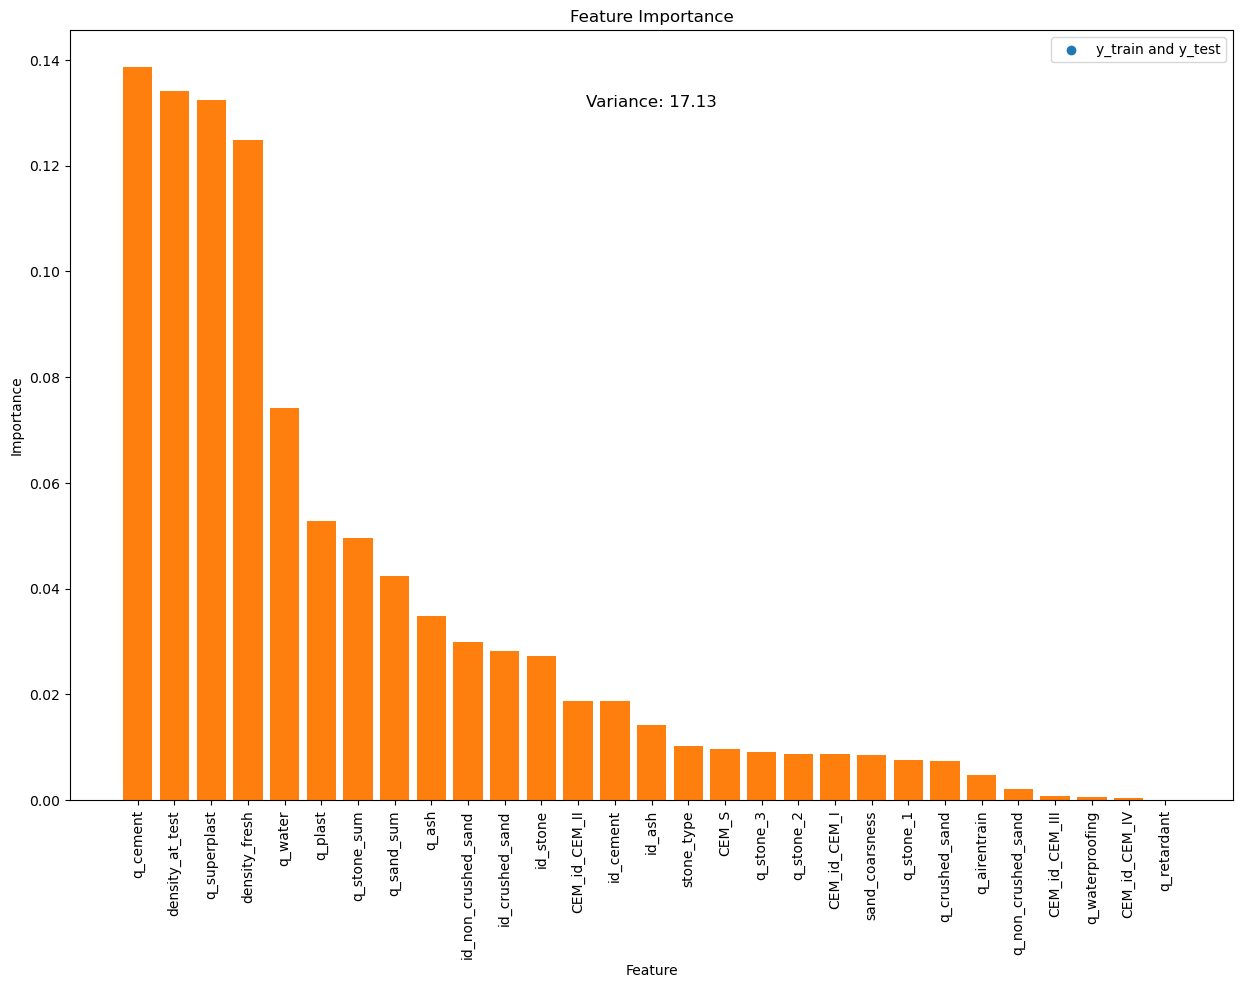

In [3]:
from data_analysis import data_processing
df = data_processing(df, target_column, target_column1)

In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop('compressive_strength',axis=1)
y = df['compressive_strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X1_train = scaler.fit_transform(X_train)
X1_test  = scaler.fit_transform(X_test)
X1_train = pd.DataFrame(X1_train, columns=X_train.columns)
X1_test  = pd.DataFrame(X1_test, columns=X_test.columns)

In [14]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import randint

param_dist = {
    'hidden_layer_sizes': [(40, 40), (50, 50), (40, 40, 40)],
    'activation': ['relu', 'logistic', 'tanh'],
    'alpha': [0.0005, 0.001, 0.005],
    'learning_rate': ['constant'],
    'learning_rate_init': [0.01, 0.05, 0.1],
    'solver': ['adam', 'sgd'],
    'batch_size': [64],
}

mlp = MLPRegressor(random_state=42, max_iter=800)
GS_search = GridSearchCV(mlp, param_grid=param_dist, cv=3, n_jobs=-1)
GS_search.fit(X1_train, y_train)

print("Best hyperparameters:")
for param, value in GS_search.best_params_.items():
    print(f"{param}: {value}")

y_pred = GS_search.predict(X1_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


C:\anaconda3\envs\learning\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
36 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "C:\anaconda3\envs\learning\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 742, in fit
    return self._fit(X, y, incremental=False)
  File "C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 486, in _fit
    raise ValueE

Best hyperparameters:
activation: tanh
alpha: 0.001
batch_size: 64
hidden_layer_sizes: (40, 40, 40)
learning_rate: constant
learning_rate_init: 0.01
solver: adam
Mean Squared Error (MSE): 21.07596710112431
Root Mean Squared Error (RMSE): 4.590856902706107


In [15]:
file = '.\concrete_mix_design_simplified.csv'
df = pd.read_csv(file)
df = df[df['age'] >= 28]
columns_to_drop = ['probe_index', 'name', 'weight_fresh', 'weight_at_test', 'size_x', 'size_y', 'size_z', 'age','slump.1']
df = df.drop(columns=columns_to_drop)
###############################################################################################    
target_column= 'slump'
target_column1 = 'compressive_strength'

best_params are: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
useless_feature: ['CEM_S', 'CEM_id_CEM_I', 'sand_coarsness', 'CEM_id_CEM_II', 'q_non_crushed_sand', 'CEM_id_CEM_IV', 'q_waterproofing', 'CEM_id_CEM_III', 'q_airentrain', 'q_retardant']


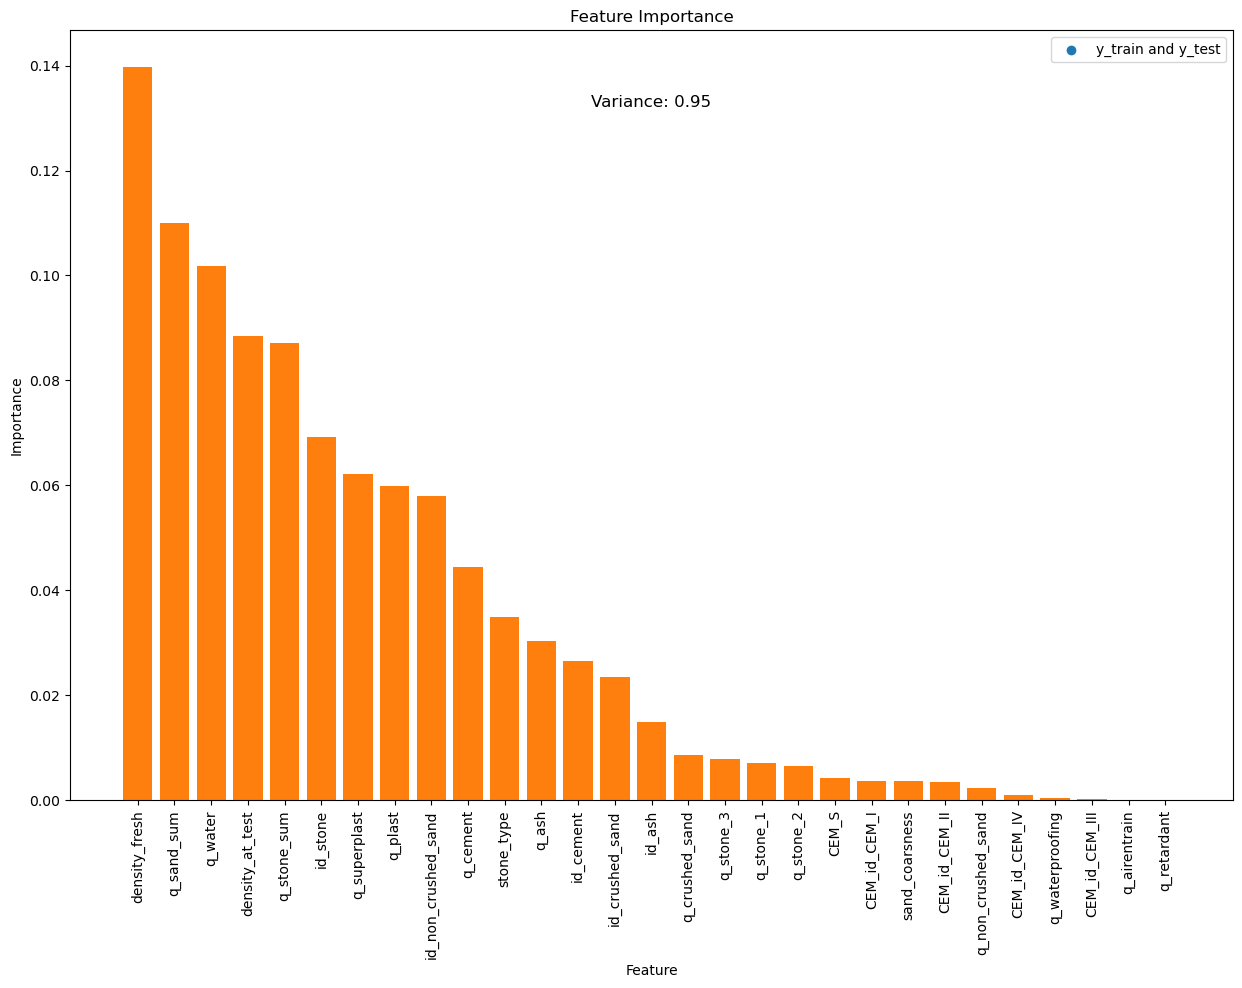

In [16]:
from data_analysis import data_processing
df = data_processing(df, target_column, target_column1)

In [17]:
X = df.drop('slump',axis=1)
y = df['slump']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X1_train = scaler.fit_transform(X_train)
X1_test  = scaler.fit_transform(X_test)
X1_train = pd.DataFrame(X1_train, columns=X_train.columns)
X1_test  = pd.DataFrame(X1_test, columns=X_test.columns)

In [18]:
param_dist = {
    'hidden_layer_sizes': [(40, 40), (50, 50), (40, 40, 40)],
    'activation': ['relu', 'logistic', 'tanh'],
    'alpha': [0.0005, 0.001, 0.005],
    'learning_rate': ['constant'],
    'learning_rate_init': [0.01, 0.05, 0.1],
    'solver': ['adam', 'sgd'],
    'batch_size': [64],
}

mlp = MLPRegressor(random_state=42, max_iter=800)
GS_search = GridSearchCV(mlp, param_grid=param_dist, cv=3, n_jobs=-1)
GS_search.fit(X1_train, y_train)

print("Best hyperparameters:")
for param, value in GS_search.best_params_.items():
    print(f"{param}: {value}")

y_pred = GS_search.predict(X1_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

C:\anaconda3\envs\learning\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
39 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\anaconda3\envs\learning\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 742, in fit
    return self._fit(X, y, incremental=False)
  File "C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 486, in _fit
    raise ValueE

Best hyperparameters:
activation: tanh
alpha: 0.0005
batch_size: 64
hidden_layer_sizes: (40, 40)
learning_rate: constant
learning_rate_init: 0.01
solver: sgd
Mean Squared Error (MSE): 2.392998832790689
Root Mean Squared Error (RMSE): 1.5469320711623664
